## K-Nearest Neighbors

**Environment Details**: 
- **OS**: OpenSUSE Tumbleweed (x86_64)
- **Python version**: 3.11.6
- **Jupyter-Lab version**: 4.0.9
***

### Pre-task setup

In [1]:
# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-Learn imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

# Nicer Jupyter output formatting
import ipywidgets as widgets

# Quiet filter warnings
import warnings
warnings.filterwarnings('ignore')

### 0) DataFrame Creation

In [2]:
# Load our 28 x 28 RGB image CSV data into a Pandas DataFrame
df = pd.read_csv('hmnist_28_28_RGB.csv')

In [3]:
# Ensure our data loaded correctly
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
# Look at summary statistics of our dataset
df.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


### 1) Data Preprocessing

**Instructions**: Do any appropriate preprocessing needed for the dataset using the 28 x 28 RGB image csv file from the Breast Cancer Dataset.

**Notes**: 
* Remember to use the check sheet list to do any appropriate outlier detection/removal, categorical data transformation to numerical data, scaling or normalization, etc.
* Be sure to justify all of your modifications in a markdown cell or as comments in code.
* Modifications without written justification will result in points lost.

In [5]:
# Create our X & y dependent & target variable data sets
y = df.label
X = df.drop(columns=['label']).to_numpy()

In [6]:
# Scale our X data by dividing each element by the max value (255)
#
# Justification: While not strictly required for kNN, it's a good practice to scale our data
# for other models we'll be using in the future. Scaling our data using the max value will not
# negatively impact our kNN model.
X = X / 255

In [7]:
# Ensure our first X value looks reasonable post-scaling
print(X[0])

[0.75294118 0.6        0.75686275 ... 0.7254902  0.60392157 0.69411765]


In [8]:
# Split our data into training / testing data sets; use a common random_state to get repeatable results
#
# Justification: Our training data set will be used for training our kNN model,
# the separate testing set will be used to evaluate how well our model performs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Ensure our data split correctly
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (8012, 2352)
X_test: (2003, 2352)
y_train: (8012,)
y_test: (2003,)


### 2) Grid Search - optimal k value

**Instructions**: Use a Grid Search to find the best model with the optimal k value.

In [10]:
# Instantiate our KNN Classifier object
knn = KNeighborsClassifier()

# Choose our starting 'k' to be the square root of the number of training examples
starting_k = math.ceil(math.sqrt(len(X_train)))

# Set our search parameters for our Grid Search
search_space = [{'n_neighbors': list(range(1, starting_k))}]

# Instantiate our Grid Search object
grid_search = GridSearchCV(knn, search_space)

# Fit our model using our training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]}])

### 3) Metrics Output

**Instructions**: Using the best model with the optimal k, output all the important metrics. 

Note: I'm looking for accuracy, precision, recall, and F1 scores.

In [11]:
# Look at our best model
model = grid_search.best_estimator_
print("k value: {}".format(model.get_params()['n_neighbors']))

k value: 13


In [12]:
# Use our model to make predictions with the X training data
y_pred = model.predict(X_train)

In [13]:
# Output specific accuracy, precision, recall, & F1 metrics for our model:
print("Accuracy: {}".format(metrics.accuracy_score(y_train, y_pred)))
print("Precision: {}".format(metrics.precision_score(y_train, y_pred, average='macro')))
print("Recall: {}".format(metrics.recall_score(y_train, y_pred, average='macro')))
print("F1 Score: {}".format(metrics.f1_score(y_train, y_pred, average='macro')))

Accuracy: 0.7331502745881179
Precision: 0.6577914433819488
Recall: 0.29985802975918696
F1 Score: 0.32804746649165273


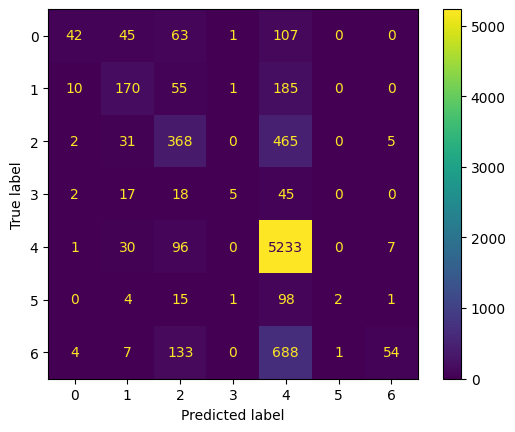

In [14]:
# Display our Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

### 4) Grid Search Metric Analysis

**Instructions**: In either a Markdown cell, or as a comment in code, output the following:
1. What value for k was chosen by the Grid Search.
2. State what the default metric the GridSearchCV function uses for 'scoring' for classification; I'm looking for either accuracy, error-rate, sensitivity, specificity, precision, recall, F1-score, or other. *See helpful links below at the bottom of this page for assistance.*
3. Given that this dataset is a cancer dataset, specify what you think the most important metric to use should be (out of the list above).

#### Responses
1. `13` was chosen for the value of k by our Grid Search
2. According to the documentation [here](https://scikit-learn.org/stable/modules/grid_search.html#specifying-an-objective-metric), **accuracy** is used for scoring for classification.
3. I think that recall is the best measure for this cancer dataset, as it would meaasure how well our model predicts someone who actually has cancer as having cancer. In other words, a false negative prediction for someone who actually has cancer would be disastrous, delaying their confirmation of cancer and subsequent treatment. Putting priority on the preservation of human life, it would be a better tradeoff to have a few false positives who would likely go through a more rigorous round of testing and confirmation than it would be to let someone who actually has cancer think that they do not from an incorrect negative prediction from our model.

### 5) GridSearchCV Hyper-Parameter Tuning

**Instructions**: Dig into the documentation for GridSearchCV [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

Now, rerun the GridSearchCV function using the more appropriate metric as the 'scoring' hyper-parameter that you specified in problem 4.3.

In [15]:
# Note: Because the Grid Search takes such a long time to run, 
# I'm creating a new set of variables for this run so as not to overwrite the previous modeling from section 3
#
# Instantiate our refined KNN Classifier object
knn_refined = KNeighborsClassifier()

# Choose our starting 'k' to be the square root of the number of training examples
starting_k = math.ceil(math.sqrt(len(X_train)))

# Set our search parameters for our Grid Search
search_space = [{'n_neighbors': list(range(1, starting_k))}]

# Instantiate our refined Grid Search object
grid_search_refined = GridSearchCV(knn_refined, search_space, scoring='recall')

# Fit our model using our training data
grid_search_refined.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='recall')

### 6) New k Value & Metrics

**Instructions**: In a Markdown cell or as comments in code, output the new value for k and specify all the important metrics.

Note: I'm looking for accuracy, precision, recall, and F1 scores for the new fit.

In [16]:
# Look at our new best model
model_refined = grid_search_refined.best_estimator_
print("k value: {}".format(model_refined.get_params()['n_neighbors']))

k value: 1


In [17]:
# Use our refined model to make predictions with the X training data
y_pred_refined = model_refined.predict(X_train)

In [18]:
# Output specific accuracy, precision, recall, & F1 metrics for our model:
print("Accuracy: {}".format(metrics.accuracy_score(y_train, y_pred_refined)))
print("Precision: {}".format(metrics.precision_score(y_train, y_pred_refined, average='macro')))
print("Recall: {}".format(metrics.recall_score(y_train, y_pred_refined, average='macro')))
print("F1 Score: {}".format(metrics.f1_score(y_train, y_pred_refined, average='macro')))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


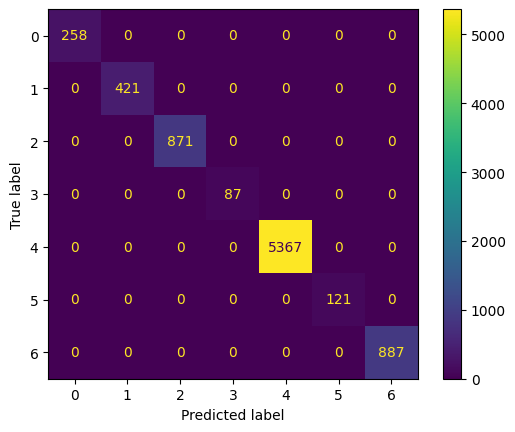

In [19]:
# Display our Confusion Matrix for our refined model
cm = metrics.confusion_matrix(y_train, y_pred_refined)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

### 7) Final Model Analysis

**Instructions**: In a markdown cell or as a comment in code, discuss which of the two models you prefer and why.

While our second model was well-intended to optimize for **recall**, it resulted in a model with a value of k=1 and based on our summary statistics is way overfitted to the data.

Because of that, the first model that optimizes for **accuracy** is the one I prefer as it's more generalizable and useful.  

I think a good third option would be to evaluate optimizing for other metrics and/or perhaps increasing the minimum k value in our `search_space` variable for the `GridSearchCV()`. Right now, the minimum value is **1**, but perhaps increasing that could make our second model optimized for recall a bit more generalizable.